# Reference evapotranspiration prediction with individual CNN models and CNN ensemble

  


In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 9.8 MB/s 


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
# !pip install keras-tcn
# #==2.8.3
# !git clone https://github.com/PatriciaLucas/CNN
# from CNN import Ensemble_estruturado as es
# from CNN import basic
# import numpy as np
# import pandas as pd
# import matplotlib as plt
# import matplotlib.pyplot as plt
# import seaborn as sns
# from statsmodels.graphics.tsaplots import plot_acf
# from scipy import stats
# import warnings
# from google.colab import files
# warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import warnings
from google.colab import files
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Equivalencia a from CNN import Ensemble_estruturado as es
RUTA = '/content/drive/MyDrive/Universidad/CNN - ET0/'
import importlib.util

def module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

es = module_from_file("es",RUTA+"CNN/Ensemble_estruturado.py")

# Equivalencia a from CNN import Ensemble_estruturado as es
basic = module_from_file("basic",RUTA+"CNN/basic.py")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Database

In [ ]:
def get_search_dataset():
    df1 = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/Evapotranspiracao/master/ETo_setelagoas.csv', sep=',')
    series = df1.iloc[:,1]
    train = series[:6939]
    test = series[8035:] #ano de teste: 2015
    return train, test

## Individual models

In [ ]:
star_CNN1 = {'filters': 1, 'pool': 0, 'pool_size': 3, 'dropout': 0.012594059561340142, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 3, 'rmse': 0.7696852129001718, 'num_param': 449}
star_CNN2 = {'filters': 1, 'dropout': 0, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 0, 'rmse': 0.7566198577347709, 'num_param': 449}
star_CNN3 = {'pilhas': 2, 'filters': 1, 'dropout': 0.2, 'norm': 1, 'lags': 48, 'num_conv': 3, 'kernel_size': 2, 'rmse': 0.7530, 'num_param': 68257}

In [ ]:
train, test = get_search_dataset()

In [ ]:
def form_data(data, t):  
  df = pd.DataFrame(data)
  df1 = df.T
  frames = [df1.iloc[:,0], df1.iloc[:,1], df1.iloc[:,2], df1.iloc[:,3], df1.iloc[:,4], df1.iloc[:,5], df1.iloc[:,6], df1.iloc[:,7], df1.iloc[:,8], df1.iloc[:,9], df1.iloc[:,10], df1.iloc[:,11],
         df1.iloc[:,12], df1.iloc[:,13], df1.iloc[:,14], df1.iloc[:,15], df1.iloc[:,16], df1.iloc[:,17],df1.iloc[:,18], df1.iloc[:,19], df1.iloc[:,20], df1.iloc[:,21], df1.iloc[:,22], df1.iloc[:,23],
         df1.iloc[:,24], df1.iloc[:,25], df1.iloc[:,26], df1.iloc[:,27], df1.iloc[:,28], df1.iloc[:,29]]
  result = pd.concat(frames)
  r = pd.DataFrame(result) 
  r.insert(1, "Model", True) 
  for i in range(300):
      r['Model'].iloc[i] = 'CNN'+ t
  return r

###CNN1

In [ ]:
results_CNN1 = []
train, test, scaler = es.get_dados(star_CNN1, train, test)
X_train, y_train, X_test, y_test = basic.slideWindow(train, test, star_CNN1['lags'])
for i in range(30):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModel(test, model, 10,  star_CNN1['lags'], scaler)
  results_CNN1.append(rmse)
  print(i) 

results_CNN1 = form_data(results_CNN1, '1')
results_CNN1.to_csv(RUTA+'results_CNN1',index=True)

Epoch 77: early stopping
0
Epoch 20: early stopping
1
Epoch 90: early stopping
2
3
Epoch 25: early stopping
4
5
6
Epoch 60: early stopping
7
8
Epoch 87: early stopping
9
10
Epoch 86: early stopping
11
12
Epoch 78: early stopping
13
14
15
Epoch 45: early stopping
16
Epoch 55: early stopping
17
18
19
Epoch 91: early stopping
20
21
Epoch 72: early stopping
22
23
24
Epoch 71: early stopping
25
26
Epoch 72: early stopping
27
Epoch 48: early stopping
28
29


###CNN2

In [ ]:
results_CNN2 = []
train, test, scaler = es.get_dados(star_CNN2, train, test)
X_train, y_train, X_test, y_test = basic.slideWindow(train, test, star_CNN2['lags'])
for i in range(30):
  model,_ = basic.modelo_CNN2(X_train, y_train, star_CNN2) 
  rmse, yhat, y_test = basic.predictModel(test, model, 10,  star_CNN2['lags'], scaler)
  results_CNN2.append(rmse)

results_CNN2 = form_data(results_CNN2, '2')
results_CNN2.to_csv(RUTA+'results_CNN2',index=True)

Epoch 55: early stopping
Epoch 39: early stopping
Epoch 54: early stopping
Epoch 47: early stopping
Epoch 60: early stopping
Epoch 42: early stopping
Epoch 58: early stopping
Epoch 51: early stopping
Epoch 26: early stopping
Epoch 39: early stopping
Epoch 49: early stopping


###CNN3

In [ ]:
results_CNN3 = []
train, test, scaler = es.get_dados(star_CNN3, train, test)
X_train, y_train, X_test, y_test = basic.slideWindow(train, test, star_CNN3['lags'])
for i in range(30):
  model3,_ = basic.modelo_CNN3(X_train, y_train, star_CNN3) 
  rmse, yhat, y_test = basic.predictModel(test, model3, 10, star_CNN3['lags'], scaler)
  results_CNN3.append(rmse)

results_CNN3 = form_data(results_CNN3, '3')
results_CNN3.to_csv(RUTA+'results_CNN3',index=True)

## Ensemble models


### CNN1

In [ ]:
train, test = get_search_dataset()
results_ECNN1 = []
for i in range(1):
  rmse, yhat, kde_list = es.executa(train, test, 0, 6)
  results_ECNN1.append(rmse)
# results_ECNN1 = form_data(results_ECNN1, 'E1')
# results_ECNN1.to_csv(RUTA+'results_ECNN1',index=True)

Epoch 91: early stopping
Epoch 85: early stopping
Epoch 44: early stopping


In [ ]:
# results_ECNN1 = form_data(results_ECNN1, 'E1')
results_ECNN1.to_csv(RUTA+'results_ECNN1',index=True)

AttributeError: ignored

In [ ]:
df_results_ECNN1 = pd.DataFrame(results_ECNN1).T
df_results_ECNN1

,0
0,0.779142
1,0.848957
2,0.898349
3,0.924631
4,0.944142
5,0.953799
6,0.961673
7,0.952112
8,0.961415
9,0.971507


###CNN2

In [ ]:
train, test = get_search_dataset()
results_ECNN2 = []
for i in range(30):
  rmse, yhat, kde_list = es.executa(train, test, 1, 6)
  results_ECNN2.append(rmse)
  print(i)
# results_ECNN2 = form_data(results_ECNN2, 'E2')
# results_ECNN2.to_csv(RUTA+'results_ECNN2',index=True)

Epoch 60: early stopping
Epoch 58: early stopping
Epoch 55: early stopping
Epoch 32: early stopping
Epoch 51: early stopping
Epoch 42: early stopping
Epoch 33: early stopping


KeyboardInterrupt: ignored

###CNN3

In [ ]:
train, test = get_search_dataset()
results_ECNN3 = []
for i in range(30):
  rmse, yhat, kde_list = es.executa(train, test, 2, 6)
  results_ECNN3.append(rmse)
  print(i)
results_ECNN3 = form_data(results_ECNN3, 'E3')
results_ECNN3.to_csv(RUTA+'results_ECNN3',index=True)

###CNNH

In [ ]:
train, test = get_search_dataset()
results_ECNNH = []
for i in range(30):
  rmse, yhat, kde_list = es.executa(train, test, 3, 6)
  results_ECNNH.append(rmse)
results_ECNNH = form_data(results_ECNNH, 'EH')
results_ECNNH.to_csv(RUTA+'results_ECNNH',index=True)

## Comparison of individual models and ensembles

Text(0, 0.5, 'RMSE')

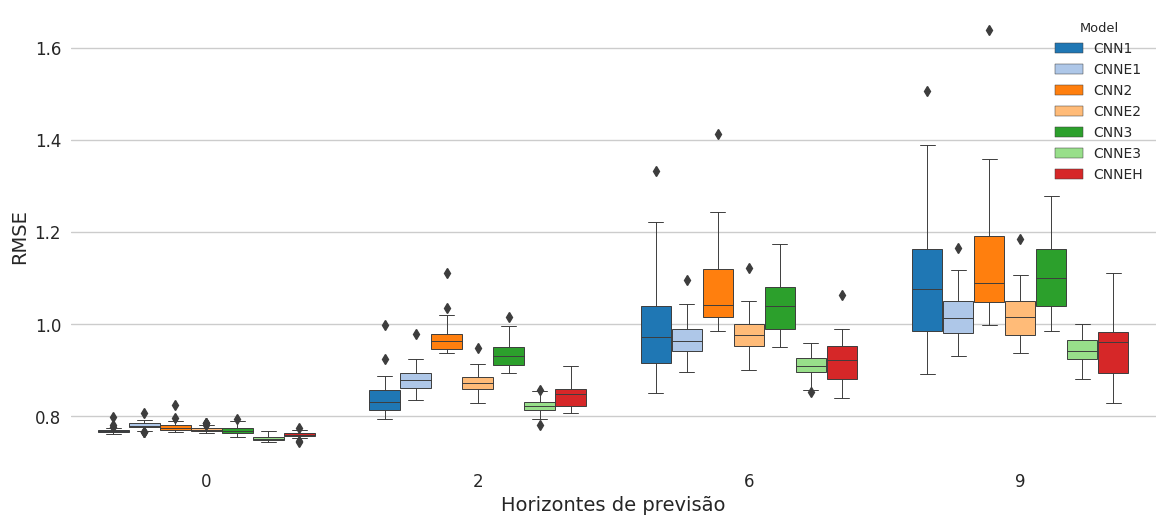

In [ ]:
CNN1 = pd.read_csv(RUTA+'results_CNN1',delimiter=',')
CNN1 = CNN1[CNN1['Unnamed: 0'].isin(['0','2','6','9'])]
CNN2 = pd.read_csv(RUTA+'results_CNN2',delimiter=',')
CNN2 = CNN2[CNN2['Unnamed: 0'].isin(['0','2','6','9'])]
CNN3 = pd.read_csv(RUTA+'results_CNN3',delimiter=',')
CNN3 = CNN3[CNN3['Unnamed: 0'].isin(['0','2','6','9'])]

ECNN1 = pd.read_csv(RUTA+'results_CNNE1',delimiter=',')
ECNN1 = ECNN1[ECNN1['Unnamed: 0'].isin(['0','2','6','9'])]
ECNN2 = pd.read_csv(RUTA+'results_CNNE2',delimiter=',')
ECNN2 = ECNN2[ECNN2['Unnamed: 0'].isin(['0','2','6','9'])]
ECNN3 = pd.read_csv(RUTA+'results_CNNE3',delimiter=',')
ECNN3 = ECNN3[ECNN3['Unnamed: 0'].isin(['0','2','6','9'])]
EHIBRIDO = pd.read_csv(RUTA+'results_CNNEH',delimiter=',')
EHIBRIDO = EHIBRIDO[EHIBRIDO['Unnamed: 0'].isin(['0','2','6','9'])]
frames = [CNN1, ECNN1, CNN2, ECNN2, CNN3, ECNN3, EHIBRIDO]
result = pd.concat(frames, ignore_index=True)

plt.style.use('seaborn')
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14,6], dpi=100)
g1 = sns.boxplot(x=result.iloc[:,0], y=result.iloc[:,1], hue=result.iloc[:,2], data=result, palette="tab20", linewidth=0.7, saturation=1)
plt.tick_params(labelsize=12)
plt.xlabel("Horizontes de previsão", fontsize=14)
plt.ylabel("RMSE", fontsize=14)